In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import gc
import random
#import torch
import zipfile
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.metrics import f1_score, fbeta_score, mean_absolute_error, accuracy_score

In [3]:
movie_col = ['movie_id', 'titulo', 'genero']
movie = pd.read_csv('movies.dat', sep='::', names=movie_col)
movie.head()

/home/mich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating_col = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('ratings.dat', sep='::', names=rating_col, usecols=range(3))
ratings.head()

/home/mich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [5]:
movie_rating = pd.merge(movie, ratings) # Juntamos los df de ratings y películas
movie_rating.head()

,movie_id,titulo,genero,user_id,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5


In [6]:
movie_rating.shape

(1000209, 5)

In [7]:
datos_completos_Nan = movie_rating.pivot_table(index=['user_id'],columns=['titulo'],values='rating')
datos_completos_Nan.head()

titulo,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
datos_completos = datos_completos_Nan.fillna(0);

In [9]:
datos_completos.head()

titulo,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
gc.collect()

153

# Escaces

In [11]:
matrix = datos_completos.values

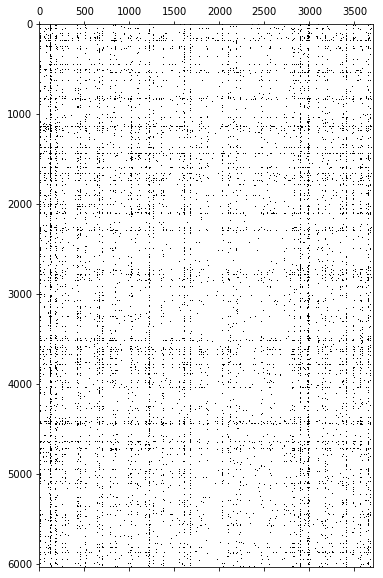

In [12]:
plt.figure(figsize=(6, 10))
plt.spy(matrix)
plt.savefig('zeros.png')

# Dividimos el dataset en train y test

In [11]:
data_train, data_test = train_test_split(datos_completos, test_size = 0.2, shuffle=True, random_state=42)

In [11]:
print(data_train.shape)
print(data_test.shape)

(4832, 3706)
(1208, 3706)


In [12]:
data_test.head()

titulo,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
5530,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Seleccionamos las películas que usaremos para predecir

In [13]:
#data_test.iloc[0]
def movie2predic(test, new_test):
    select = []
    for i in test.index:
        k = 0
        vistos = data_test.T[data_test.loc[i,:]>0].index.tolist()
        porcentaje = int(np.round(len(vistos)/10)) #Seleccionamos el 10% de las peliculas vistas
        sel = random.sample(vistos, porcentaje)
        select.append([i, sel])
        new_test.loc[i,sel]=0
        k += 1
    return select, new_test

In [14]:
auxiliar = data_test.copy()

In [15]:
seleccionados, data_valid = movie2predic(data_test, auxiliar)

In [15]:
data_valid.head()

titulo,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
5530,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Busqueda de los k vecinos más cercanos

In [50]:
nbrs = NearestNeighbors(n_neighbors=15, algorithm='auto', metric='cosine').fit(data_train)

In [51]:
distances, indices = nbrs.kneighbors(data_valid)

In [ ]:
len(distances)

In [32]:
indices[0]

array([2193, 3857, 4784, 3235, 4762, 2613, 4622, 1798, 4044, 2335, 4172,
       3734, 2588,  364, 3007, 4041, 2518, 4724, 1051, 1691])

In [33]:
distances[0]

array([0.49295684, 0.51336442, 0.51610956, 0.52459294, 0.53050332,
       0.53109796, 0.53124633, 0.53282293, 0.53775306, 0.54750422,
       0.55339285, 0.55369705, 0.55378073, 0.55569875, 0.5557102 ,
       0.5557732 , 0.55670001, 0.55774189, 0.55999138, 0.56001874])

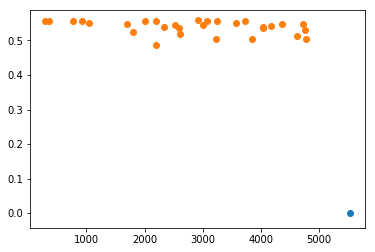

In [18]:
plt.scatter(5530,0)
plt.scatter(indices[0], distances[0])

# Pedicción

In [29]:
def pred(valid, train, dist, users, pelis):
    copia_v = valid.copy()
    data_filter = train[train > 0]
    data_filter_v = valid[valid > 0]
    prom = data_filter.mean(axis = 1)
    prom_valid = data_filter_v.mean(axis=1)
    i = 0
    for k in valid.index:
        r_a = prom_valid.iloc[i]
        r_b = prom.loc[users[i]]
        lamb = dist[i]/sum(dist[i])
        vistos = train.loc[users[i], pelis[i][1]]
        r_rb = vistos.T - r_b
        cal_pred = np.round(r_a+((lamb*r_rb).sum(axis = 1)/sum(dist[i])))
        copia_v.loc[k, pelis[i][1]] = cal_pred
        i += 1
    return copia_v

In [52]:
prediccion = pred(data_valid, data_train, distances, indices, seleccionados)

/home/mich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.
/home/mich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if sys.path[0] == '':


In [22]:
prediccion.loc[4924, seleccionados[2][1]] 

titulo
Manchurian Candidate, The (1962)    4.0
L.A. Confidential (1997)            4.0
Sling Blade (1996)                  4.0
In the Company of Men (1997)        4.0
Name: 4924, dtype: float64

In [23]:
data_test.loc[4924, seleccionados[2][1]]

titulo
Manchurian Candidate, The (1962)    3.0
L.A. Confidential (1997)            3.0
Sling Blade (1996)                  4.0
In the Company of Men (1997)        4.0
Name: 4924, dtype: float64

# Error

In [31]:
mean_absolute_error(data_test, prediccion) #Los ceros tienen peso aquí

0.0034323256005117887

In [32]:
def MAE(test, predict, pelis):
    aux = []
    k = 0
    for i in test.index:
        aux.append(mean_absolute_error(test.loc[i, pelis[k][1]], predict.loc[i, pelis[k][1]]))
        k += 1
    return sum(aux)/len(aux)

In [53]:
error = MAE(data_test, prediccion, seleccionados)
print(error)
print(error/5)

0.8371205659621008
0.16742411319242018


In [56]:
y_true = [0.5,1.6,2.3,5.0,2.9]
y_pred = [-0.5,0.6,1.3,4.0,1.9]
mean_absolute_error(y_true, y_pred)

1.0